In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('car_data.csv');

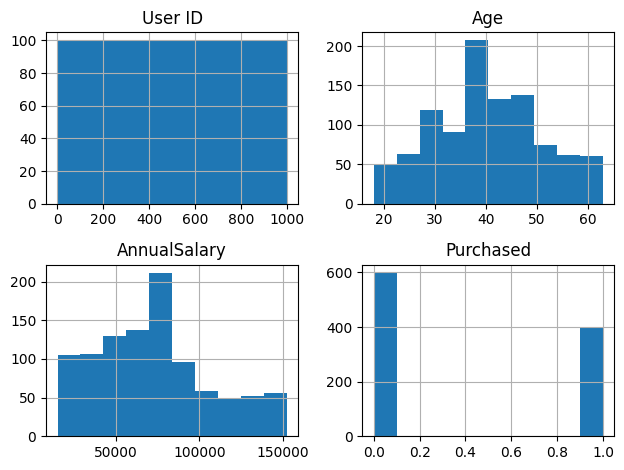

In [18]:
# Plot histograms
df.hist()
plt.tight_layout()
plt.show()

In [19]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict(X_train, y_train, x_test, k):
    distances = []

    for i in range(len(X_train)):
        distance = euclidean_distance(x_test, X_train[i])
        distances.append((distance, y_train[i]))

    # Sort
    distances = sorted(distances)[:k]

    # Count the number of each class in the k-nearest points
    counts = {}
    for i in range(len(distances)):
        label = distances[i][1]
        if label in counts:
            counts[label] += 1
        else:
            counts[label] = 1

    # Get the most common class label
    max_count = 0
    max_label = None
    for label, count in counts.items():
        if count > max_count:
            max_count = count
            max_label = label

    return max_label

# Min-Max Scaling without library function
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled = (data - min_val) / (max_val - min_val)
    return scaled




## 1(a)

In [21]:
# feature and target 
X = df[['Age', 'AnnualSalary']].values
y = df['Purchased'].values

# train test split
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

# predicting
k = 5
predictions = []
for i in range(len(X_test)):
    pred = predict(X_train, y_train, X_test[i], k)
    predictions.append(pred)

# accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy of k-Nearest Neighbors (without scaling): {:.2f}%".format(accuracy))

Accuracy of k-Nearest Neighbors (without scaling): 81.00%


## 1(b)

In [27]:
# (i) scale the data
df['Age'] = min_max_scaling(df['Age'])
df['AnnualSalary'] = min_max_scaling(df['AnnualSalary'])

X_scaled = df[['Age', 'AnnualSalary']].values
X_train_scaled = X_scaled[:800]
X_test_scaled = X_scaled[800:]

k = 5
predictions_scaled = []
for i in range(len(X_test_scaled)):
    pred = predict(X_train_scaled, y_train, X_test_scaled[i], k)
    predictions_scaled.append(pred)

# accuracy
accuracy_scaled = np.mean(predictions_scaled == y_test) * 100
print("Accuracy of k-Nearest Neighbors (with scaling): {:.2f}%".format(accuracy_scaled))



Accuracy of k-Nearest Neighbors (with scaling): 91.00%
